In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
import pickle
import numpy as np

import crflux.models as pm
import mceq_underground_helpers_cs as mh

In [4]:
plot_dir = '/hetghome/khymon/Plots/cs-analysis/'

In [15]:
# Load the pickle file
with open("/hetghome/khymon/cs-files/R_value_const_pi-air_k-air_sibyll23c_smooth_k-pi.pkl", "rb") as file:
    data = pickle.load(file)

# Print or inspect the data
print(data)

{('1.5', '1.0', '0.9', '0.9', '2212', 'apr', '1000.0'): array([0.91894865, 0.9159867 , 0.91374023]), ('1.5', '1.0', '0.9', '1.0', '2212', 'apr', '1000.0'): array([0.93800558, 0.93575293, 0.93379738]), ('1.5', '1.0', '0.9', '1.1', '2212', 'apr', '1000.0'): array([0.95503028, 0.95321119, 0.95146274]), ('1.5', '1.0', '1.0', '0.9', '2212', 'apr', '1000.0'): array([0.97988954, 0.97949252, 0.97889584]), ('1.5', '1.0', '1.0', '1.0', '2212', 'apr', '1000.0'): array([1., 1., 1.]), ('1.5', '1.0', '1.0', '1.1', '2212', 'apr', '1000.0'): array([1.01770102, 1.0183696 , 1.01861027]), ('1.5', '1.0', '1.1', '0.9', '2212', 'apr', '1000.0'): array([1.03070577, 1.03249636, 1.03390618]), ('1.5', '1.0', '1.1', '1.0', '2212', 'apr', '1000.0'): array([1.05149215, 1.05403155, 1.05612656]), ('1.5', '1.0', '1.1', '1.1', '2212', 'apr', '1000.0'): array([1.07008029, 1.07300019, 1.07548308]), ('3.5', '1.0', '0.9', '0.9', '2212', 'apr', '1000.0'): array([0.94749595, 0.93939204, 0.93388737]), ('3.5', '1.0', '0.9', '

In [6]:
cs = [0.9,1.0,1.1]
angles = mh.angles

In [7]:
#default order: (str(d), str(cs_p1), str(cs_p2), str(cs_k2), str(ptype), season, str(e0))
def get_data(fixed_params):
    #values = sorted({key[1] for key in data.keys() if key[0] == fixed_params[0] and key[2] == fixed_params[1] and key[3] == fixed_params[2] and key[3] == fixed_params[3]})

    # Collect data for each cs
    sel_data = data[(fixed_params[0], "1.0", fixed_params[1], fixed_params[2], "2212","apr", "1000.0" )] 

    return np.array(sel_data)

In [8]:
data_d35_csp2_09 = get_data(("3.5", "0.9", "1.0"))
data_d35_csp2_11 = get_data(("3.5", "1.1", "1.0"))

data_d35_csk2_09 = get_data(("3.5", "1.0", "0.9"))
data_d35_csk2_09 = get_data(("3.5", "1.0", "1.1"))

data_d35_csp2_09_csk2_11 = get_data(("3.5", "0.9", "1.1"))
data_d35_csp2_11_csk2_09 = get_data(("3.5", "1.1", "0.9"))

data_d15_csp2_09 = get_data(("1.5", "0.9", "1.0"))
data_d15_csp2_11 = get_data(("1.5", "1.1", "1.0"))

data_d15_csk2_09 = get_data(("1.5", "1.0", "0.9"))
data_d15_csk2_09 = get_data(("1.5", "1.0", "1.1"))

data_d15_csp2_09_csk2_11 = get_data(("1.5", "0.9", "1.1"))
data_d15_csp2_11_csk2_09 = get_data(("1.5", "1.1", "0.9"))

data_d15_csp2_09_csk2_09 = get_data(("1.5", "0.9", "0.9"))
data_d15_csp2_11_csk2_11 = get_data(("1.5", "1.1", "1.1"))

data_d35_csp2_09_csk2_09 = get_data(("3.5", "0.9", "0.9"))
data_d35_csp2_11_csk2_11 = get_data(("3.5", "1.1", "1.1"))

data_d35_csp2_09_csk2_10 = get_data(("3.5", "0.9", "1.0"))
data_d35_csp2_11_csk2_10 = get_data(("3.5", "1.1", "1.0"))

data_d15_csp2_09_csk2_10 = get_data(("1.5", "0.9", "1.0"))
data_d15_csp2_11_csk2_10 = get_data(("1.5", "1.1", "1.0"))

In [9]:
data_d35_csp2_09

array([0.96115786, 0.95481018, 0.95051959])

In [10]:
data_d35_csp2_09_csk2_11

array([0.97278356, 0.96812473, 0.96487132])

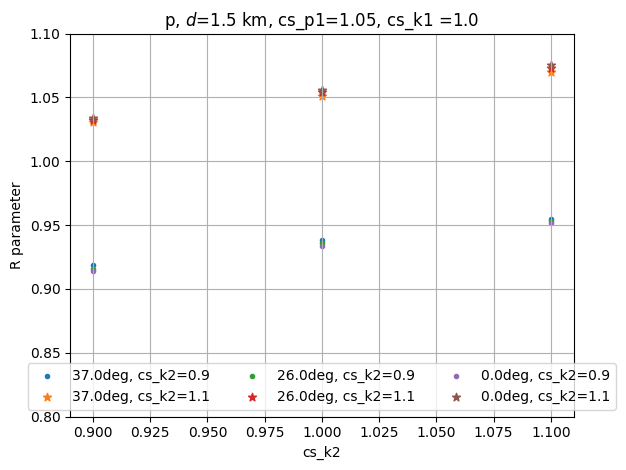

In [11]:
plt.figure()
for i in range(3):
    plt.scatter(cs, [data_d15_csp2_09_csk2_09[i], data_d15_csp2_09_csk2_10[i], data_d15_csp2_09_csk2_11[i]],label=str(np.round(angles[i],decimals=0)) + 'deg, cs_k2=0.9',marker='.')
    plt.scatter(cs, [data_d15_csp2_11_csk2_09[i], data_d15_csp2_11_csk2_10[i],data_d15_csp2_11_csk2_11[i]],label=str(np.round(angles[i],decimals=0)) + 'deg, cs_k2=1.1',marker='*')

plt.xlabel('cs_k2')
plt.ylabel('R parameter')
plt.legend(loc='lower center',ncol=3)
plt.title('p, $d$=1.5 km, cs_p1=1.05, cs_k1 =1.0')
plt.ylim(0.8,1.1)
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth1.5_csk2.png' )

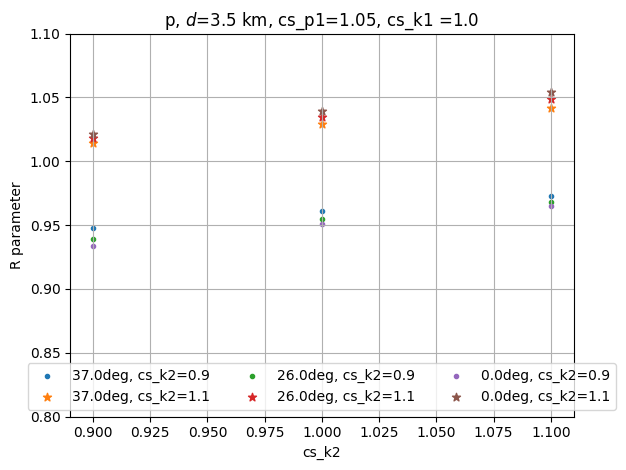

In [12]:
plt.figure()
for i in range(3):
    plt.scatter(cs, [data_d35_csp2_09_csk2_09[i], data_d35_csp2_09_csk2_10[i], data_d35_csp2_09_csk2_11[i]],label=str(np.round(angles[i],decimals=0)) + 'deg, cs_k2=0.9',marker='.')
    plt.scatter(cs, [data_d35_csp2_11_csk2_09[i], data_d35_csp2_11_csk2_10[i], data_d35_csp2_11_csk2_11[i]],label=str(np.round(angles[i],decimals=0)) + 'deg, cs_k2=1.1',marker='*')

plt.xlabel('cs_k2')
plt.ylabel('R parameter')
plt.legend(loc='lower center',ncol=3)
plt.title('p, $d$=3.5 km, cs_p1=1.05, cs_k1 =1.0')
plt.ylim(0.8,1.1)
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth3.5_csk2.png' )

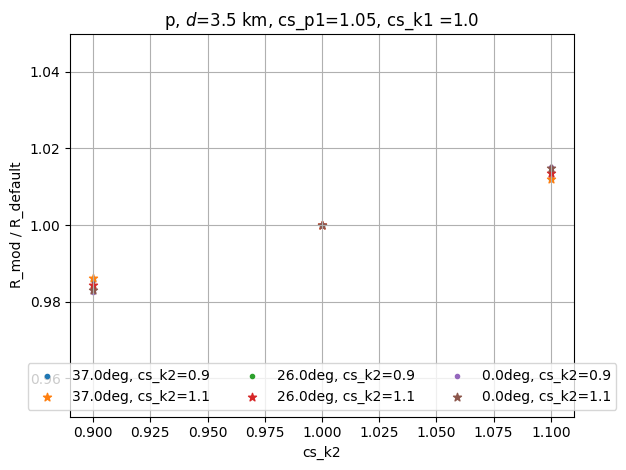

In [13]:
# deviation to normal R

plt.figure()
for i in range(3):
    plt.scatter(cs, [data_d35_csp2_09_csk2_09[i], data_d35_csp2_09_csk2_10[i], data_d35_csp2_09_csk2_11[i]]/data_d35_csp2_09_csk2_10[i],label=str(np.round(angles[i],decimals=0)) + 'deg, cs_k2=0.9',marker='.')
    plt.scatter(cs, [data_d35_csp2_11_csk2_09[i], data_d35_csp2_11_csk2_10[i], data_d35_csp2_11_csk2_11[i]]/data_d35_csp2_11_csk2_10[i],label=str(np.round(angles[i],decimals=0)) + 'deg, cs_k2=1.1',marker='*')

plt.xlabel('cs_k2')
plt.ylabel('R_mod / R_default')
plt.legend(loc='lower center',ncol=3)
plt.title('p, $d$=3.5 km, cs_p1=1.05, cs_k1 =1.0')
plt.ylim(0.95,1.05)
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth3.5_csk2_ratio.png' )

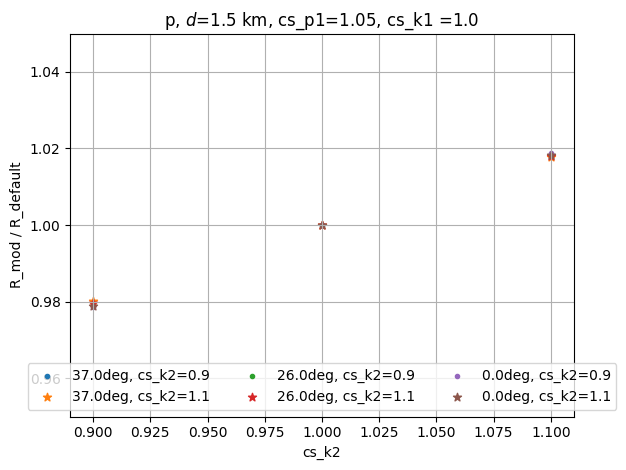

In [14]:
plt.figure()
for i in range(3):
    plt.scatter(cs, [data_d15_csp2_09_csk2_09[i], data_d15_csp2_09_csk2_10[i], data_d15_csp2_09_csk2_11[i]]/data_d15_csp2_09_csk2_10[i],label=str(np.round(angles[i],decimals=0)) + 'deg, cs_k2=0.9',marker='.')
    plt.scatter(cs, [data_d15_csp2_11_csk2_09[i], data_d15_csp2_11_csk2_10[i], data_d15_csp2_11_csk2_11[i]]/data_d15_csp2_11_csk2_10[i],label=str(np.round(angles[i],decimals=0)) + 'deg, cs_k2=1.1',marker='*')

plt.xlabel('cs_k2')
plt.ylabel('R_mod / R_default')
plt.legend(loc='lower center',ncol=3)
plt.title('p, $d$=1.5 km, cs_p1=1.05, cs_k1 =1.0')
plt.ylim(0.95,1.05)
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth1.5_csk2_ratio.png' )

## Investigate impact of kaon-air cross section modification

In [16]:
# Load the pickle file
with open("/hetghome/khymon/cs-files/R_value_const_pi-air_k-air_sibyll23c_smooth_k.pkl", "rb") as file:
    data = pickle.load(file)

# Print or inspect the data
print(data)

{('1.5', '1.0', '1.0', '0.95', '0.9', '2212', 'jan', '1000.0'): array([0.91690303, 0.91677247, 0.91858222]), ('1.5', '1.0', '1.0', '0.95', '0.9', '2212', 'apr', '1000.0'): array([0.98424368, 0.98342093, 0.98233724]), ('1.5', '1.0', '1.0', '0.95', '0.9', '2212', 'jul', '1000.0'): array([1.04846146, 1.04029131, 1.03214712]), ('1.5', '1.0', '1.0', '0.95', '1.0', '2212', 'jan', '1000.0'): array([0.93618937, 0.93645665, 0.93851156]), ('1.5', '1.0', '1.0', '0.95', '1.0', '2212', 'apr', '1000.0'): array([1.00442383, 1.00404801, 1.00352445]), ('1.5', '1.0', '1.0', '0.95', '1.0', '2212', 'jul', '1000.0'): array([1.06868352, 1.06088021, 1.05298874]), ('1.5', '1.0', '1.0', '0.95', '1.1', '2212', 'jan', '1000.0'): array([0.95315466, 0.95404246, 0.95624175]), ('1.5', '1.0', '1.0', '0.95', '1.1', '2212', 'apr', '1000.0'): array([1.0224718 , 1.02249826, 1.02220515]), ('1.5', '1.0', '1.0', '0.95', '1.1', '2212', 'jul', '1000.0'): array([1.08650802, 1.07912714, 1.07147495]), ('1.5', '1.0', '1.0', '1.0'

In [17]:
#default order: (str(d), str(cs_p1), str(cs_p2), str(cs_k2), str(ptype), season, str(e0))
def get_data(fixed_params):
    #values = sorted({key[1] for key in data.keys() if key[0] == fixed_params[0] and key[2] == fixed_params[1] and key[3] == fixed_params[2] and key[3] == fixed_params[3]})

    # Collect data for each cs
    sel_data = data[(fixed_params[0], "1.0", "1.0" , fixed_params[1], fixed_params[2], "2212","apr", "1000.0" )] #pion-air cross section is unmodified

    return np.array(sel_data)

In [20]:
data_d35_csk2_09 = get_data(("3.5", "1.0", "0.9"))
data_d35_csk2_11 = get_data(("3.5", "1.0", "1.1"))

data_d15_csk2_09 = get_data(("1.5", "1.0", "0.9"))
data_d15_csk2_11 = get_data(("1.5", "1.0", "1.1"))

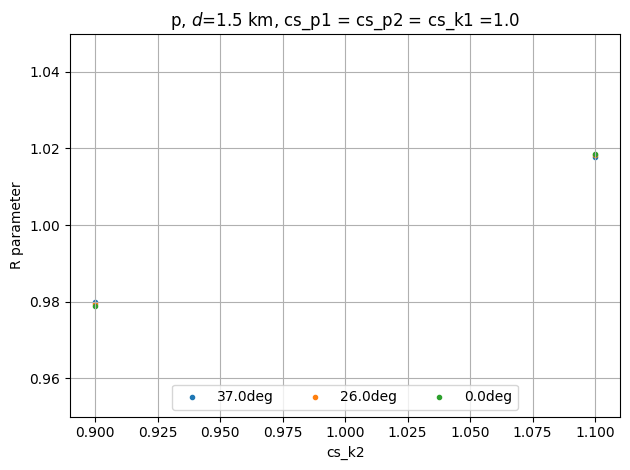

In [23]:
plt.figure()
for i in range(3):
    plt.scatter([0.9,1.1], [data_d15_csk2_09[i], data_d15_csk2_11[i]],label=str(np.round(angles[i],decimals=0)) + 'deg',marker='.')
  
plt.xlabel('cs_k2')
plt.ylabel('R parameter')
plt.legend(loc='lower center',ncol=3)
plt.title('p, $d$=1.5 km, cs_p1 = cs_p2 = cs_k1 =1.0')
plt.ylim(0.95,1.05)
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth1.5_csk2_only.png' )